In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Simulate n stocks and return the end stock prices:
# - All n stocks start at price of 1
# - bull_stock_rate in [0, 1]: ratio of stocks that are up by 50%. The rest of stocks are down by 50% 
def sim_n_stocks(n, bull_stock_rate):
    bull_stock_mask = np.random.uniform(low=0, high=1, size=n) < bull_stock_rate
    stock_prices = bull_stock_mask * 1.5 + (1-bull_stock_mask) * 0.5
    return stock_prices

# Simulate the return rates of investment in num_sims simulations
def sim_portfolio(success_pred_rates, bull_stock_rate, num_stocks=10000, num_sims=1000):
    return_rates = []
    for i in range(num_sims):
        # simulate n stocks
        stocks = sim_n_stocks(n=num_stocks, bull_stock_rate=bull_stock_rate)
        stocks_bought_mask = np.ones(num_stocks).astype(np.bool)
        for success_pred_rate in success_pred_rates:
            success_pred = np.random.uniform(low=0, high=1, size=num_stocks) < success_pred_rate
            stocks_bought_mask = np.logical_and(
                stocks_bought_mask, 
                success_pred * (stocks > 1) + (1 - success_pred) * (stocks < 1))
        value_of_stocks_bought = np.sum(stocks_bought_mask * stocks)
        num_stocks_bought = np.sum(stocks_bought_mask)
        return_rate = (value_of_stocks_bought - num_stocks_bought * 1) / (num_stocks_bought * 1)
        return_rates.append(return_rate)
    return return_rates

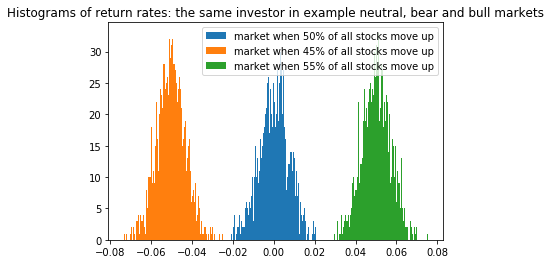

In [60]:
for bull_stock_rate in [0.5, 0.45, 0.55]:
    plt.hist(
        sim_portfolio(
            success_pred_rates=[0.5], 
            bull_stock_rate=bull_stock_rate), 
        bins=100, label=f'market when {int(bull_stock_rate*100)}% of all stocks move up')
plt.title(f'Histograms of return rates: the same investor in example neutral, bear and bull markets')
plt.legend()

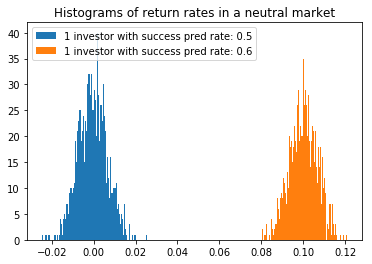

In [67]:
for success_pred_rate in [0.5, 0.6]:
    plt.hist(
        sim_portfolio(
            success_pred_rates=[success_pred_rate], bull_stock_rate=0.5), 
        bins=100, label=f'1 investor with success pred rate: {success_pred_rate}')
plt.title(f'Histograms of return rates in a neutral market')
plt.legend()

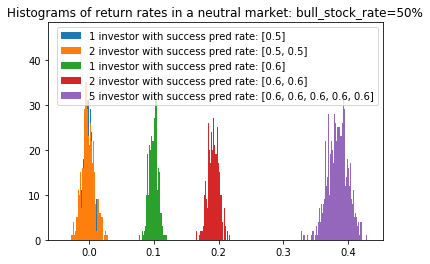

In [66]:
for success_pred_rates in [[0.5], [0.5, 0.5], [0.6], [0.6, 0.6], [0.6, 0.6, 0.6, 0.6, 0.6]]:
    plt.hist(
        sim_portfolio(
            success_pred_rates=success_pred_rates, bull_stock_rate=0.5), 
        bins=100, label=f'{len(success_pred_rates)} investor with success pred rate: {success_pred_rates}')
plt.title(f'Histograms of return rates in a neutral market: bull_stock_rate=50%')
plt.legend()

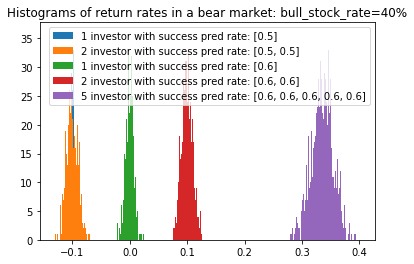

In [65]:
for success_pred_rates in [[0.5], [0.5, 0.5], [0.6], [0.6, 0.6], [0.6, 0.6, 0.6, 0.6, 0.6]]:
    plt.hist(
        sim_portfolio(
            success_pred_rates=success_pred_rates, bull_stock_rate=0.4), 
        bins=100, label=f'{len(success_pred_rates)} investor with success pred rate: {success_pred_rates}')
plt.title(f'Histograms of return rates in a bear market: bull_stock_rate=40%')
plt.legend()